## Численные методы. Задание 3.1
#### Козловский А.А., гр. 2253
#### Вариант 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

from IPython.display import display, Markdown

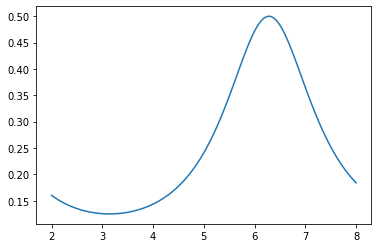

In [2]:
f = lambda x: 1 / (5 - 3 * np.cos(x))
a, b = 2, 8
x = np.linspace(a, b, 100)

plt.plot(x, f(x))
plt.show()

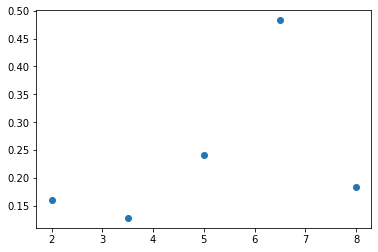

In [3]:
table_count = 5
x_table = np.linspace(a, b, table_count)
y_table = np.array([f(x) for x in x_table])

value_table = np.concatenate(([x_table], [y_table]))
plt.scatter(value_table[0], value_table[1])
plt.show()

In [4]:
df_table = pd.DataFrame(columns=[f'x{i}' 
                                 for i, _ in enumerate(value_table.T)],
                        index=['x', 'f(x)'], data=value_table)
display(df_table)

,x0,x1,x2,x3,x4
x,2.00000,3.500000,5.000000,6.500000,8.000000
f(x),0.16004,0.128051,0.241021,0.483036,0.183942


#### Кусочно-линейная интерполяция
Для линейной интерполяции воспользуемся свойством подобных трегулоьников.
Предположим, что мы уже нашли между какими точками из таблицы находится точка, в которой нас интересует значение функции. Пусть эти точки $A$ и $B$. Тогда построим прямогульный трегульник $\triangle AOB$, где $AB$ - гипотенуза, а $AO || Ox$, $BO || Oy$.
Согласно линейной интерполяции, точка, приближенное значение мы ищем находится на отрезке AB. Проведем от нее отрезок, параллельный AO до катета BO. тогда получается, что
$$\triangle AOB \sim \triangle THB$$.

Отсюда следует, что
$$\frac{TH}{AO} = \frac{BH}{BO}$$.
Мы знаем $T_{x}$, $A$ и $B$. задача своится к тому, чтобы найти $T_{y}$. Для этого нам просто необходимо вычислить длину стороны $BH$. Получается, что
$$BH = \frac{TH \cdot BO}{AO}$$.

А координата $T_{y}$, т.е. значение функции в точке $T_{x}$ будет получаться следующим образом:
$$T_{y} = B_{y} - BH$$
$$T_{y} = B_{y} - \frac{TH \cdot BO}{AO}$$

Реализуем функцию линейной интерполяции

In [5]:
def lin_inter(point, table):
    """Функция для вычисления приближенного значения
    функции в точке методом линейной интерполяции
    point: точка, в которой надо вычислить значение функции
    table: таблица значений функции
    returns: значение функции"""
    left, right = 0, 0
    for num, value in enumerate(table.T):
        if point < value[0]:
            left, right = table.T[num - 1], table.T[num]
            break
          
    th, bo = right[0] - point, right[1] - left[1]
    ao = right[0] - left[0]
    result = right[1] - th * bo / ao
    
    return result

#### Интерполяция полиномом
Можем заметить, что линейная и квадратичная интерполяции являются частными случаями интерполяции полиномом $\sum_{i=0}^{n} a_{i} x^{i}$
Для того, чтобы провести интерполяцию полиномом n-ой степени необходимо n точек, в которых будет известно значение и функции и тогда, наша задача сведется в подбору коэффициентов полинома $a_{i}$. А это в свою очередь сводится к решению СЛАУ, где матрица коэффициентов:
$$\pmatrix{
x_{0}^{0} & x_{0}^{1} & x_{0}^{2} & ... & x_{0}^{n} \\
x_{1}^{0} & x_{1}^{1} & x_{1}^{2} & ... & x_{1}^{n} \\
&&...&& \\
x_{n}^{0} & x_{n}^{1} & x_{n}^{2} & ... & x_{n}^{n}}$$, где $x_{j}$ - координата по $Ox$ j-ой точки, использованной для проведения интерполяции.
Вектор свободных членов же имеет вид 
$$\pmatrix{y_{0} & y_{1} & ... & y_{n}}$$

Реализуем функцию для интерполяции полиномом n-ой степени, чтобы в дальнейшем использовать её для квадратичной и линейной интерполяций.

In [6]:
def p_inter(point, table, n):
    """Функция для интерполяцией полиномом
    point: точка, в которой надо вычислить значение функции
    table: таблица значений функции
    returns: значениe функции, лямбда функцию, получившеюся в ходе
    интерполяции"""    
    x = table[0]
    y = table[1]
    x_inter = np.argsort(np.abs(point - x))[:n+1]
    matrix = np.array([[x[x_] ** i for i in range(n+1)]
                       for x_ in x_inter])   
    free_values = np.array([y[x_] for x_ in x_inter])
    pol_res = np.linalg.solve(matrix, free_values.T)

    f = lambda x: np.sum([koef * x ** i for i, koef in enumerate(pol_res)])
    return f(point), pol_res

После реализации необходимых для интерполяций функции, произведем линейную и квадратичную интерполяцию. В случае линейной воспользуемся двумя представленными выше способами. В случае квадратичной будем использовать интерполяцию полиномом при n=2

#### Осуществление линейной интерполяции
Осуществим линеуню интерполяцию для нахождения функции в точке. Для сравнения построим график исходной функции и значение функции, найденное в итоге интерполяции


Отклонения получившегося значения функции от действительного имеет отклонение 0.022

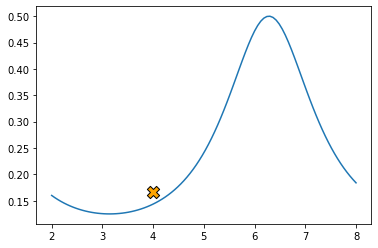

In [7]:
point_x = 4
point_y = lin_inter(point_x, value_table)
error = np.abs(point_y - f(point_x))
display(Markdown(rf'''
Отклонения получившегося значения функции от действительного имеет отклонение {error:.3f}'''))

plt.plot(x, f(x))
plt.scatter(point_x, point_y, marker='X', color='orange',
           s=150, edgecolors='black')
plt.show()

Теперь произведем линейную интерполяцию через интерполяцию многочлена 1 степени


Отклонения получившегося значения функции от действительного имеет отклонение 0.022

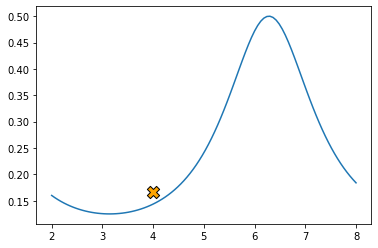

In [8]:
point_y_p = p_inter(point_x, value_table, 1)
error_p = np.abs(point_y_p[0] - f(point_x))
display(Markdown(rf'''
Отклонения получившегося значения функции от действительного имеет отклонение {error:.3f}'''))

plt.plot(x, f(x))
plt.scatter(point_x, point_y_p[0], marker='X', color='orange',
           s=150, edgecolors='black')
plt.show()

In [9]:
display(Markdown(rf'''
Разница получившихся значений двума способами составляет: {np.abs(point_y - point_y_p[0])}'''))


Разница получившихся значений двума способами составляет: 2.7755575615628914e-17

### Осуществление квадратичной интерполяции
Теперь проведем квадратичную интерполяцию через интерполяцию полинома степени 2.


Как мы видим из графиков, квадратичная интерполяция тчочнее. Отклонения найденного значения
с действительным различается всего на 0.00594

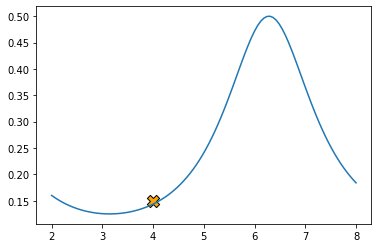

In [10]:
point_y_q = p_inter(point_x, value_table, 2)
error_q = np.abs(point_y_q[0] - f(point_x))
display(Markdown(rf'''
Как мы видим из графиков, квадратичная интерполяция тчочнее. Отклонения найденного значения
с действительным различается всего на {np.abs(point_y_q[0] - f(point_x)):.5f}'''))

plt.plot(x, f(x))
plt.scatter(point_x, point_y_q[0], marker='X', 
           color='orange', s=150, edgecolor='black')
plt.show()